In [13]:
import sys
import numpy as np

print("Python Float Info:")
print(sys.float_info, "\n")

# Function per calcolare l'epsilon macchina
def compute_epsilon(dtype):
    epsilon = dtype(1.0)
    while dtype(1.0) + epsilon != dtype(1.0):
        epsilon /= dtype(2.0)
    return epsilon * dtype(2.0)  # L'ultimo valore prima di fermare il loop è l'epsilon

# Calcolo epsilon in varie precisioni fp
eps_float16 = compute_epsilon(np.float16)
eps_float32 = compute_epsilon(np.float32)
eps_float64 = compute_epsilon(np.float64) #float normale usato da python --> fp64

# Calcolo le cifre della mantissa
mantissa_digits_16 = -np.log2(eps_float16)
mantissa_digits_32 = -np.log2(eps_float32)
mantissa_digits_64 = -np.log2(eps_float64)

print(f"epsilon for float16: {eps_float16}")
print(f"epsilon for float32: {eps_float32}")
print(f"epsilon for float64: {eps_float64}")

print(f"Mantissa for float16: {int(mantissa_digits_16)}")
print(f"Mantissa for float32: {int(mantissa_digits_32)}")
print(f"Mantissa for float64: {int(mantissa_digits_64)}")

# 6 Controllo con i valori predefiniti di numpy
print("\nNumPy np.finfo results:")
print(f"NumPy np.finfo(float16).eps: {np.finfo(np.float16).eps}")
print(f"NumPy np.finfo(float32).eps: {np.finfo(np.float32).eps}")
print(f"NumPy np.finfo(float64).eps: {np.finfo(np.float64).eps}")


Python Float Info:
sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1) 

epsilon for float16: 0.0009765625
epsilon for float32: 1.1920928955078125e-07
epsilon for float64: 2.220446049250313e-16
Mantissa for float16: 10
Mantissa for float32: 23
Mantissa for float64: 52

NumPy np.finfo results:
NumPy np.finfo(float16).eps: 0.0009765625
NumPy np.finfo(float32).eps: 1.1920928955078125e-07
NumPy np.finfo(float64).eps: 2.220446049250313e-16


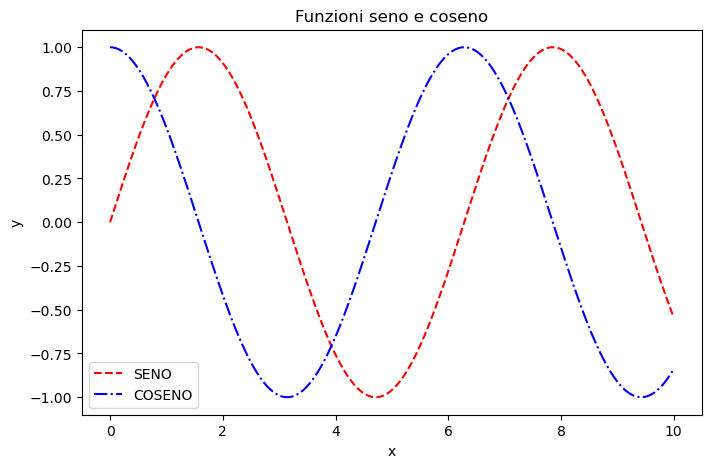

In [7]:
import matplotlib.pyplot as plt

# Genera i valori x nell'intervallo [0,10]
x = np.linspace(0, 10, 400)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Crea il grafico
plt.figure(figsize=(8, 5))
plt.plot(x, y_sin, label="SENO", color="red", linestyle="--")
plt.plot(x, y_cos, label="COSENO", color="blue", linestyle="-.")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Funzioni seno e coseno")
plt.legend()
# stampa il grafico
plt.show()


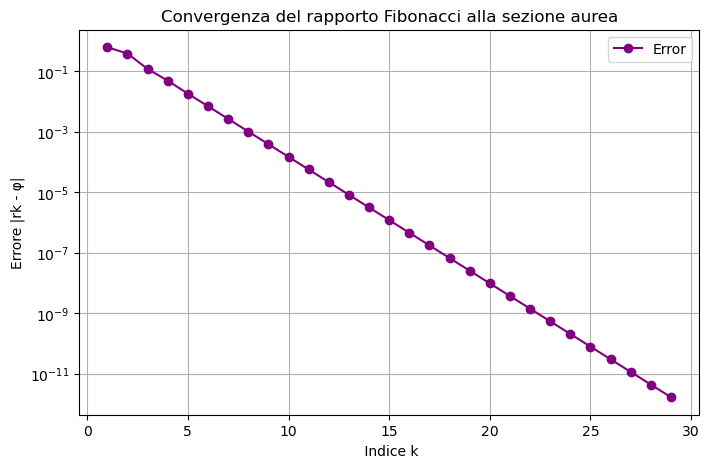

In [11]:
# Funzione fibonacci classica
def fibonacci(n):
    if n <= 0:
        return []
    fib_seq = [1, 1]
    for _ in range(2, n):
        fib_seq.append(fib_seq[-1] + fib_seq[-2])
    return fib_seq

# rapporto fibonacci
def fibonacci_ratios(n):
    fib_seq = fibonacci(n)
    ratios = [fib_seq[i+1] / fib_seq[i] for i in range(len(fib_seq)-1)]
    return ratios

# Calcola l'errore in base ai vari rapporti
golden_ratio = (1 + np.sqrt(5)) / 2
n_values = 30  # numeri di fibonacci da calcolare
ratios = fibonacci_ratios(n_values)
errors = np.abs(np.array(ratios) - golden_ratio)

# grafico
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(errors) + 1), errors, marker="o", linestyle="-", color="purple", label="Error")
plt.yscale("log")  # scala logaritmica
plt.xlabel(" Indice k")
plt.ylabel("Errore |rk - φ|")
plt.title("Convergenza del rapporto Fibonacci alla sezione aurea")
plt.legend()
plt.grid()
plt.show()
